Here we create models of variant allele frequency (VAF) distribution based on the empirical VAF distribution from Taejeong Bae et al 2018 (Science 359 (6375), 550-555).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import attila_utils
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
#matplotlib.rcParams['figure.figsize'] = [7, 5]
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

In [2]:
import truth_sets_aaf as tsa
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Import the VAF values for all variants in sample S316 and S320

In [3]:
vaf_emp = tsa.get_taejeongs_vaf(samples=['S316', 'S320'], scale2pct=True)

['named-figure/tj-vaf-hist.png', 'named-figure/tj-vaf-hist.pdf']

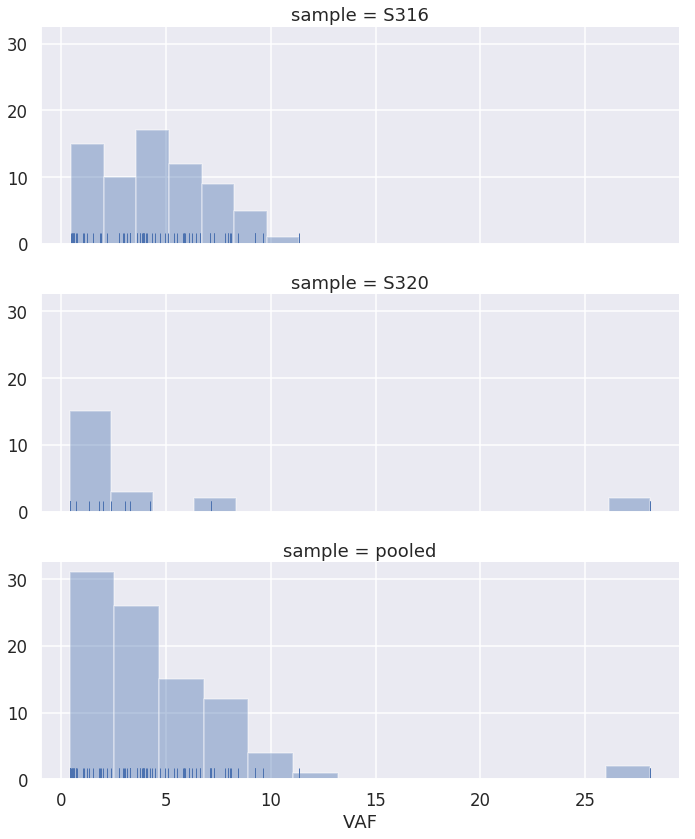

In [12]:
g = tsa.vaf_distplot(vaf_emp, fit=None)
attila_utils.savefig(g, 'tj-vaf-hist')

In [13]:
d = {c: tsa.lambda_hat(vaf_emp[vaf_emp['sample'] == c]['VAF']) for c in vaf_emp['sample'].cat.categories}
pd.DataFrame(d, index=['lambda_hat'])

,S316,S320,pooled
lambda_hat,0.221052,0.235704,0.224425


['named-figure/tj-vaf-hist-expon.png', 'named-figure/tj-vaf-hist-expon.pdf']

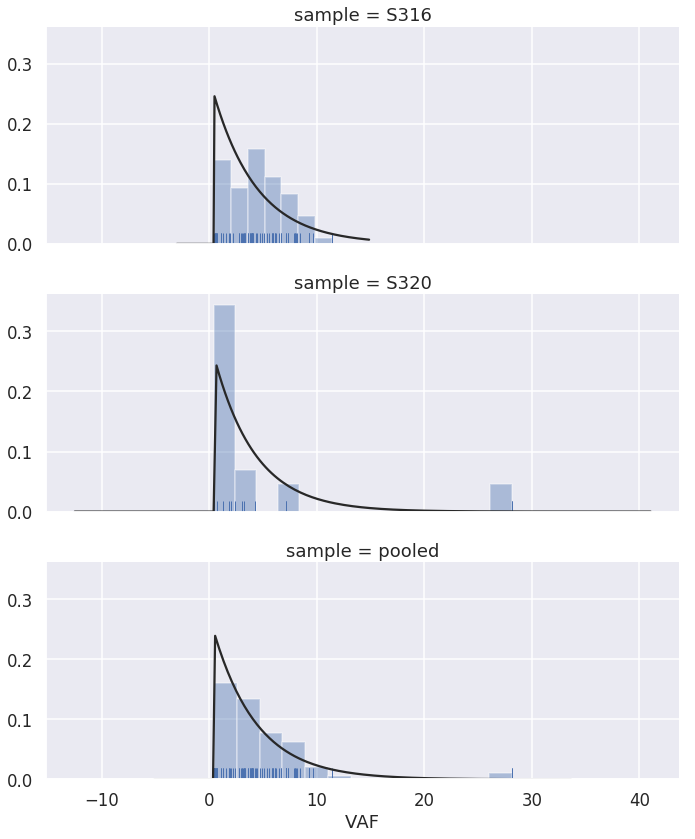

In [14]:
g = tsa.vaf_distplot(vaf_emp, fit=stats.expon)
attila_utils.savefig(g, 'tj-vaf-hist-expon')